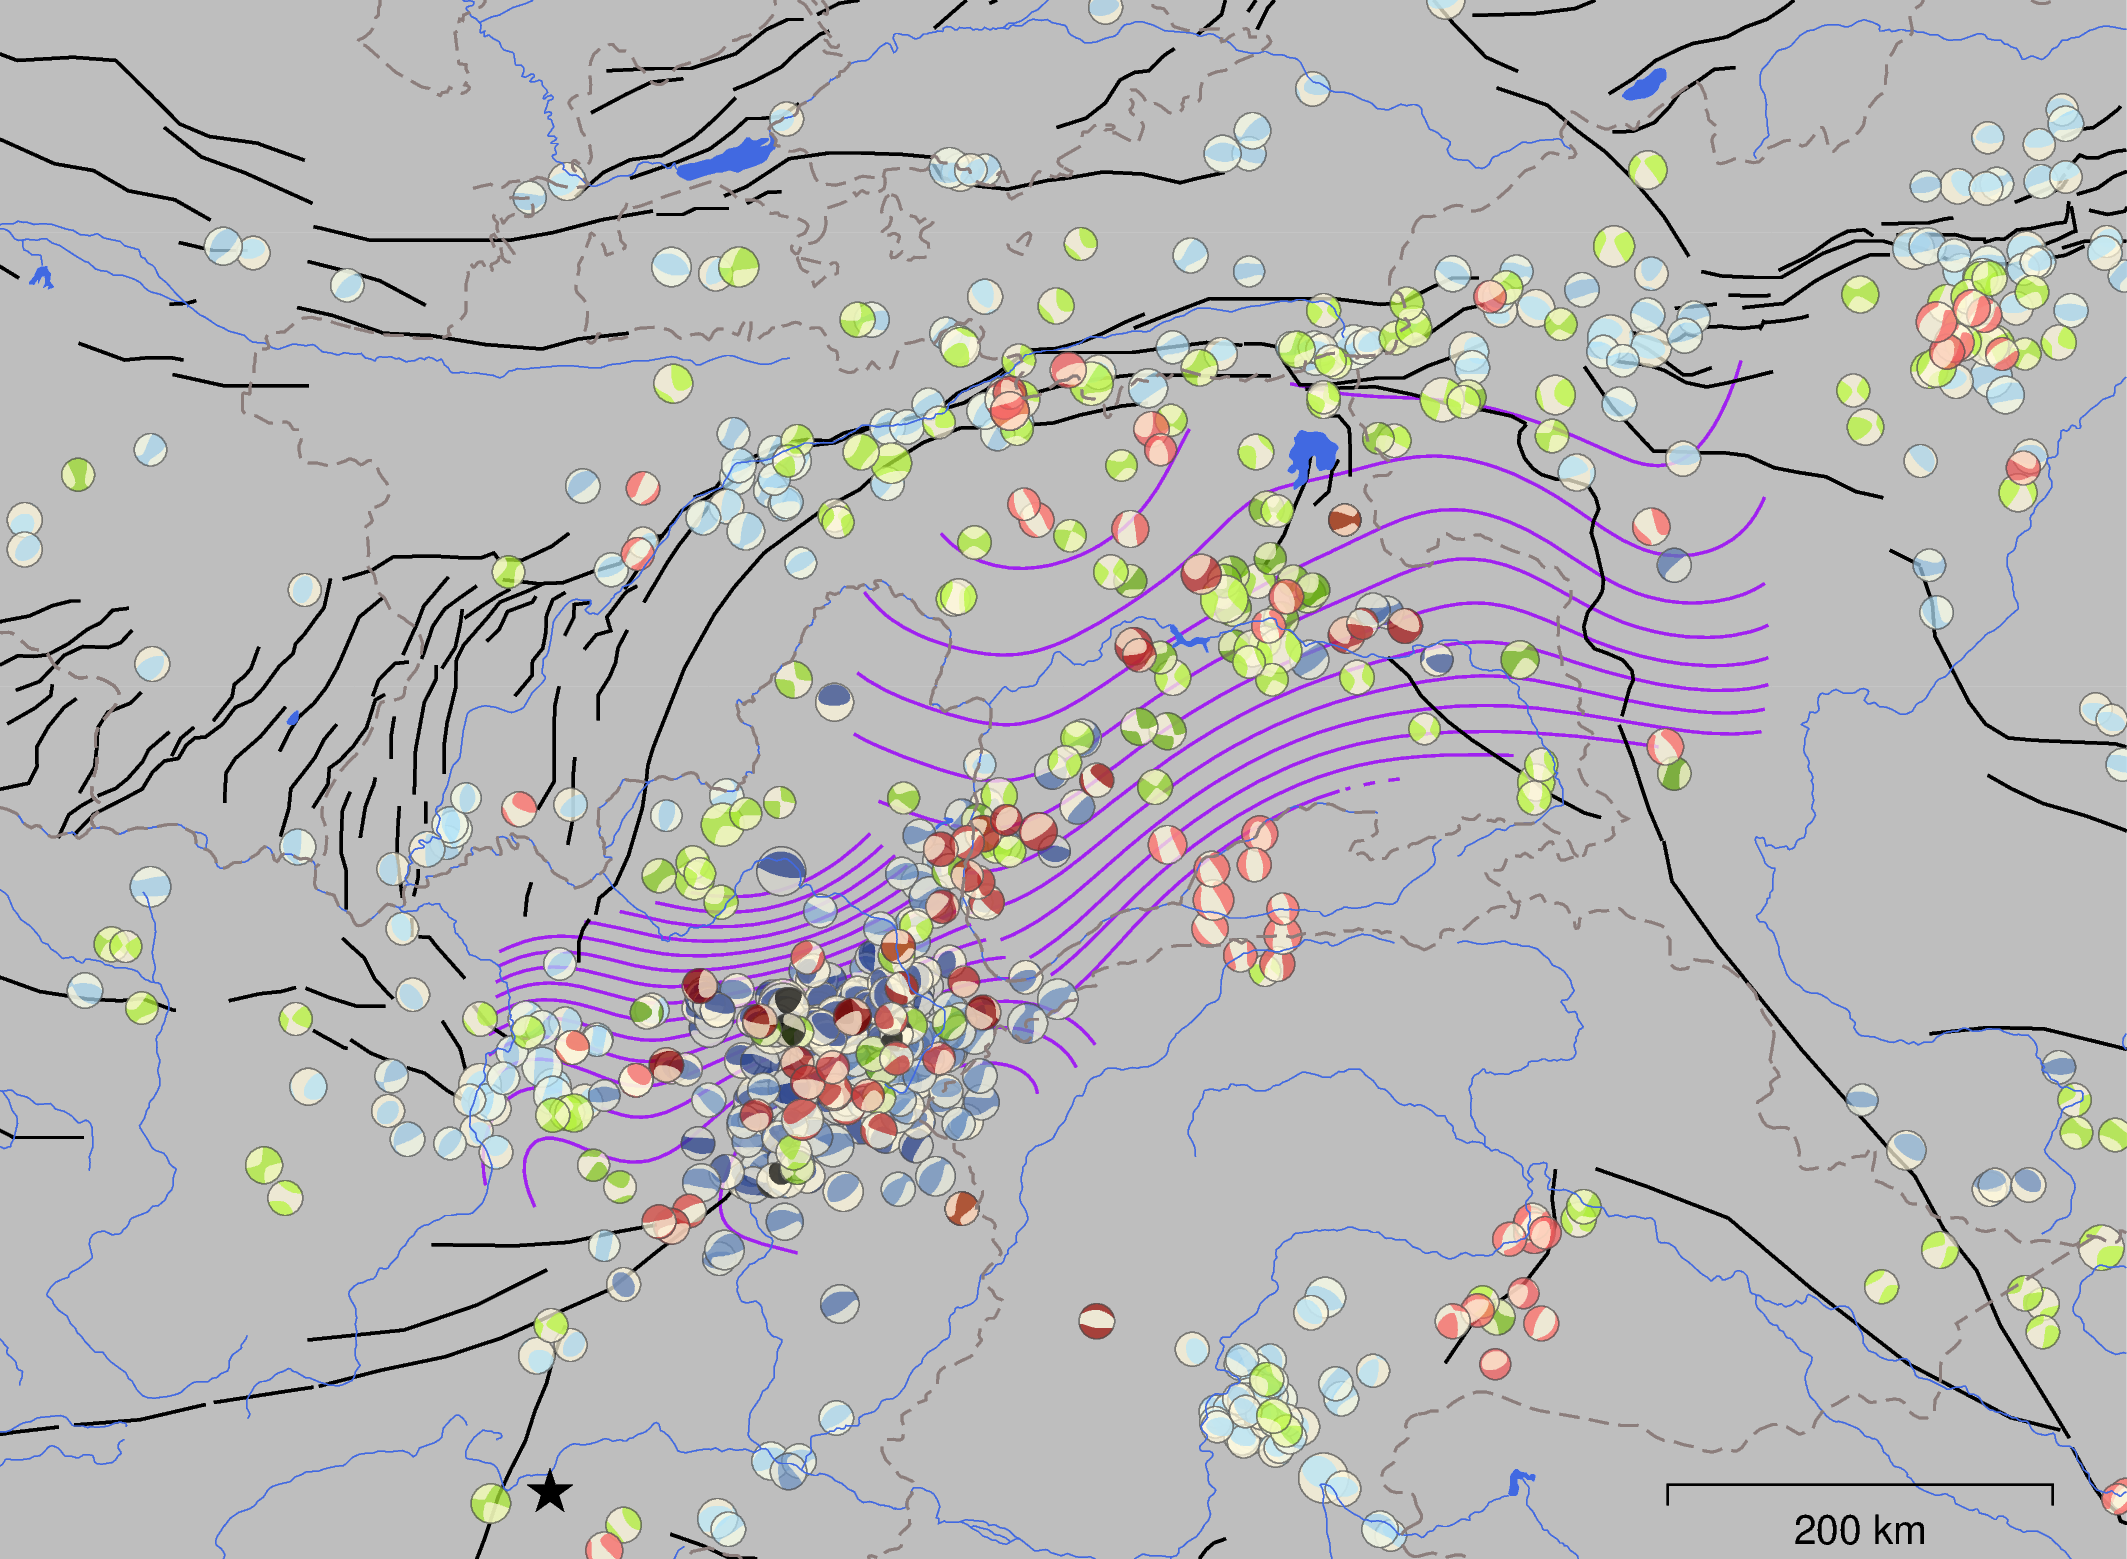

In [7]:
import pygmt

### Making a demo pyGMT basemap ###

###########################################
## Specify coords
# llcrnrlat,llcrnrlon, urcrnrlat, urcrnrlon
# are the lat/lon values of the lower left and upper right corners of the map

llcrnrlon=66 # lower left corner longitude 
llcrnrlat=34 # lower left corner latitude
urcrnrlon=78 # upper right corner longitude
urcrnrlat=41 # upper right corner latitude


proj_scale_w = 18 # specify projection scale (width)
proj_scale_unit = "c" # choose between c (cm) and i (inches)
# 17.78c = 7i

meca_scale = "0.28c" # meca scale
meca_trans = 28
###########################################

centerlon = (urcrnrlon - llcrnrlon)/2 + llcrnrlon # midpoints
centerlat = (urcrnrlat - llcrnrlat)/2 + llcrnrlat
region=[llcrnrlon, urcrnrlon, llcrnrlat, urcrnrlat]


fig = pygmt.Figure()
fig.coast(region=region,\
          projection="M%s/%s/%s%s" % (centerlon, urcrnrlat, proj_scale_w, proj_scale_unit),\
          water="white", land="grey", shorelines="1/0.5p")

          # Mercator
          # a2f0.5 --> major ticks every 2 and minor ticks every 0.5


## plot slab2.0 here
fig.plot(data="bin/hin_slab2_dep_02.24.18_contours.in", pen=f"0.65p,purple") # Hindu Kush, bounding coords 66 74 40 34
fig.plot(data="bin/pam_slab2_dep_02.26.18_contours.in", pen=f"0.65p,purple") # Pamir, bounding coords 68 78 41 35


## plotting faults
# https://www.pygmt.org/dev/gallery/lines/linefronts.html
fig.plot(data="bin/HimaTibetMap.gmt", pen=f"0.7p,black") # all faults


## plotting HarvardCMT earthquakes by fault style 20160309 20240710
fig.meca(
    spec="bin/HarvardCMT_thrust_dropname.xy",
    convention="mt", scale=meca_scale,
    cmap="bin/blue.cpt",
    extensionfill="cornsilk",
    # Draw a 0.5 points thick dark gray ("gray30") solid outline via
    # the pen parameter [Default is "0.25p,black,solid"]
    pen="thinnest,gray30,solid", transparency=meca_trans,
)

fig.meca(
    spec="bin/HarvardCMT_ss_dropname.xy",
    convention="mt", scale=meca_scale,
    cmap="bin/green.cpt",
    extensionfill="cornsilk",
    pen="thinnest,gray30,solid", transparency=meca_trans,
)

fig.meca(
    spec="bin/HarvardCMT_normal_dropname.xy",
    convention="mt", scale=meca_scale,
    cmap="bin/red.cpt",
    extensionfill="cornsilk",
    pen="thinnest,gray30,solid", transparency=meca_trans,
)

fig.coast(map_scale="g76.5/34.3+w200k", shorelines="1/0.5p", borders="1/0.6p, mistyrose4,-",\
                  lakes="royalblue", rivers="a/ royalblue", water="royalblue")

## plotting cities and stuff
fig.plot(x=69.1042, y=34.3131, style="a0.38c", pen="black", fill="black")  # Kabul
fig.show()
fig.savefig("Hindu_Kush.png")

In [8]:
#import IntPyGMT_overlay
from IntPyGMT.IntPyGMT_overlay import interactive_pygmt

%matplotlib inline
%matplotlib widget

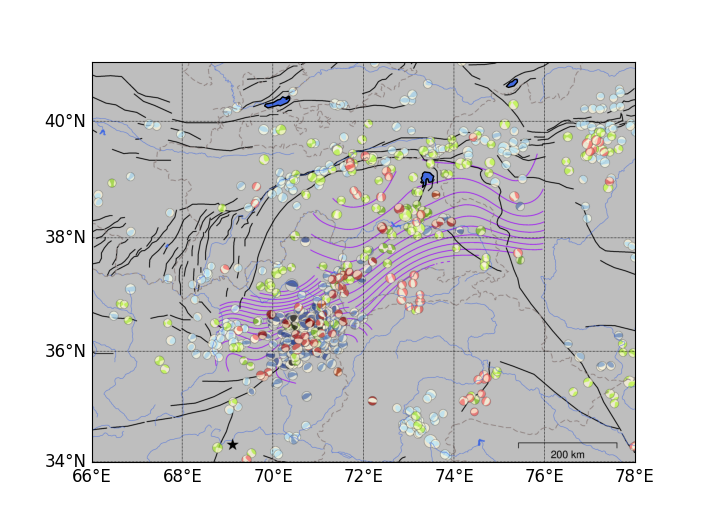

In [9]:
grid_freq = 2
interactive_pygmt("Hindu_Kush.png", llcrnrlat, urcrnrlat, llcrnrlon, urcrnrlon, grid_freq)